In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
df = pd.read_csv('EnergyProduction.csv', index_col=0, parse_dates=True)

In [11]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


<Axes: xlabel='DATE'>

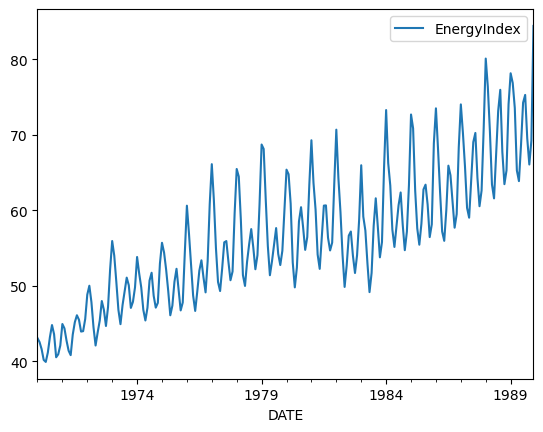

In [12]:
df.plot()

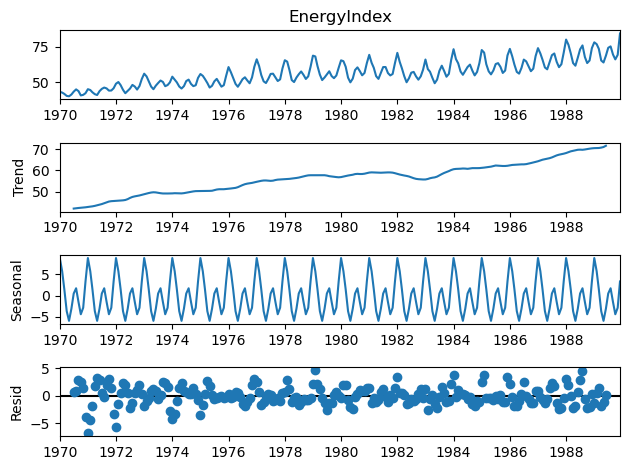

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['EnergyIndex'], model='add') 
result.plot();

# Moving Average

In [7]:
df['6-month-SMA'] = df['EnergyIndex'].rolling(window=6).mean()
df['12-month-SMA'] = df['EnergyIndex'].rolling(window=12).mean()

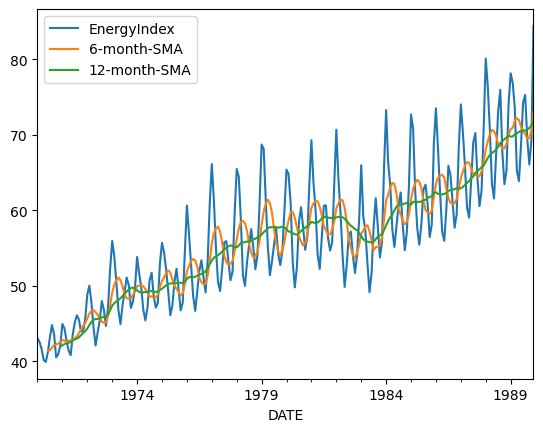

In [8]:
df.plot();

# EWMA

In [17]:
df['EWMA12'] = df['EnergyIndex'].ewm(span=12,adjust=False).mean()

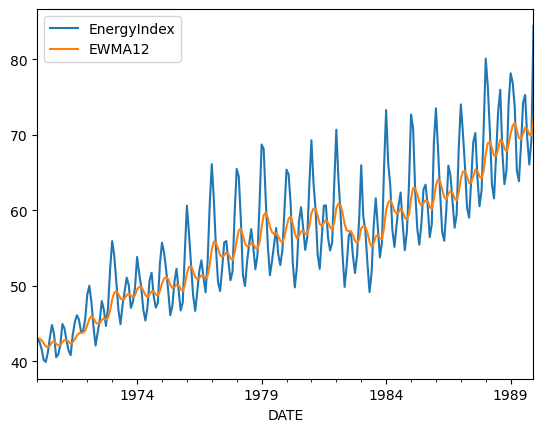

In [19]:
df[['EnergyIndex','EWMA12']].plot();

# Simple Exponential Smoothing

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['SES12']=SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

C:\Users\willi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,EnergyIndex,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
DATE,,,,,,,
1970-01-01,43.0869,43.086900,43.086900,43.259779,43.114639,43.278955,43.087033
1970-02-01,42.5577,43.005485,43.005485,42.730579,42.585099,41.795502,41.068162
1970-03-01,41.6215,42.792564,42.792564,41.794379,41.648296,40.062372,39.724741
1970-04-01,40.1982,42.393431,42.393431,40.371079,40.224080,38.738994,37.961983
1970-05-01,39.9321,42.014765,42.014765,40.104979,39.957808,38.955049,38.600731


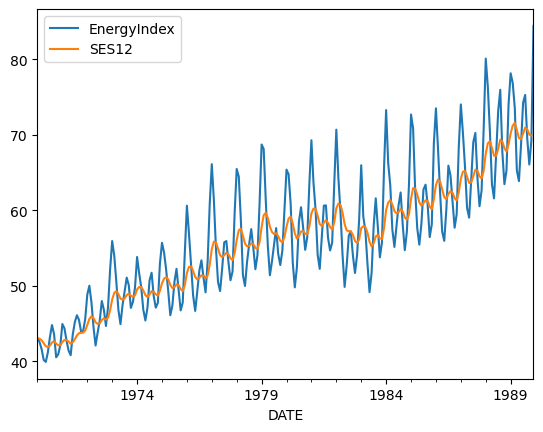

In [40]:
df[['EnergyIndex','SES12']].plot();

# Exponential Smoothing

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['DESadd12'] = ExponentialSmoothing(df['EnergyIndex'], trend='add').fit().fittedvalues.shift(-1)
df.head()

C:\Users\willi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,EnergyIndex,EWMA12,SES12,DESadd12
DATE,,,,
1970-01-01,43.0869,43.086900,43.086900,43.259779
1970-02-01,42.5577,43.005485,43.005485,42.730579
1970-03-01,41.6215,42.792564,42.792564,41.794379
1970-04-01,40.1982,42.393431,42.393431,40.371079
1970-05-01,39.9321,42.014765,42.014765,40.104979


In [24]:
df['DESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

C:\Users\willi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,EnergyIndex,EWMA12,SES12,DESadd12,DESmul12
DATE,,,,,
1970-01-01,43.0869,43.086900,43.086900,43.259779,43.114639
1970-02-01,42.5577,43.005485,43.005485,42.730579,42.585099
1970-03-01,41.6215,42.792564,42.792564,41.794379,41.648296
1970-04-01,40.1982,42.393431,42.393431,40.371079,40.224080
1970-05-01,39.9321,42.014765,42.014765,40.104979,39.957808


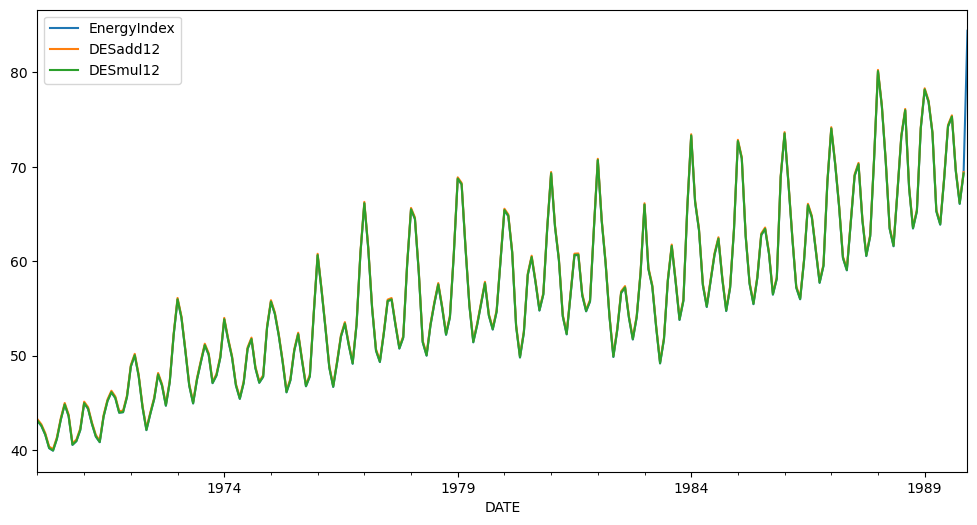

In [34]:
df[['EnergyIndex','DESadd12','DESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

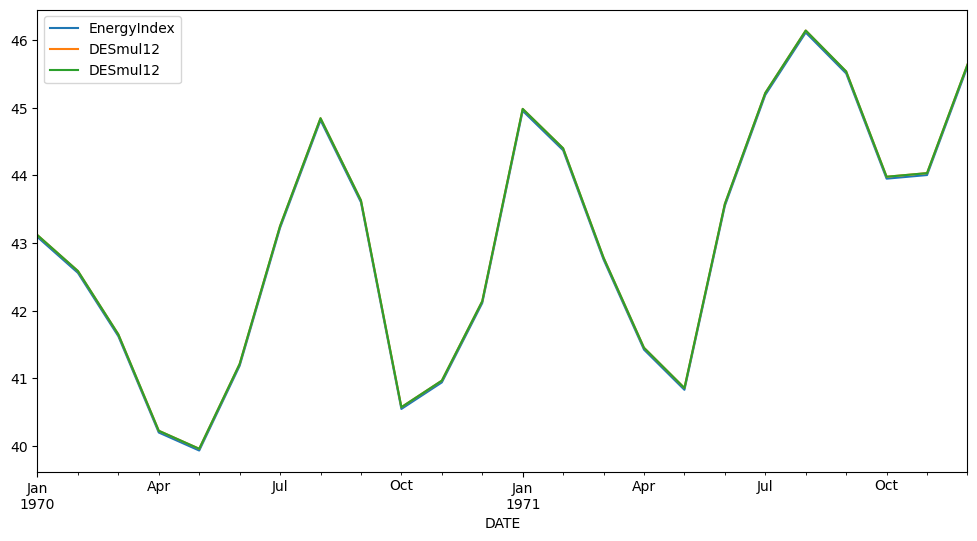

In [35]:
df[['EnergyIndex','DESmul12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Triple Exponential Smoothing

In [30]:
df['TESadd12'] = ExponentialSmoothing(df['EnergyIndex'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

C:\Users\willi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\willi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


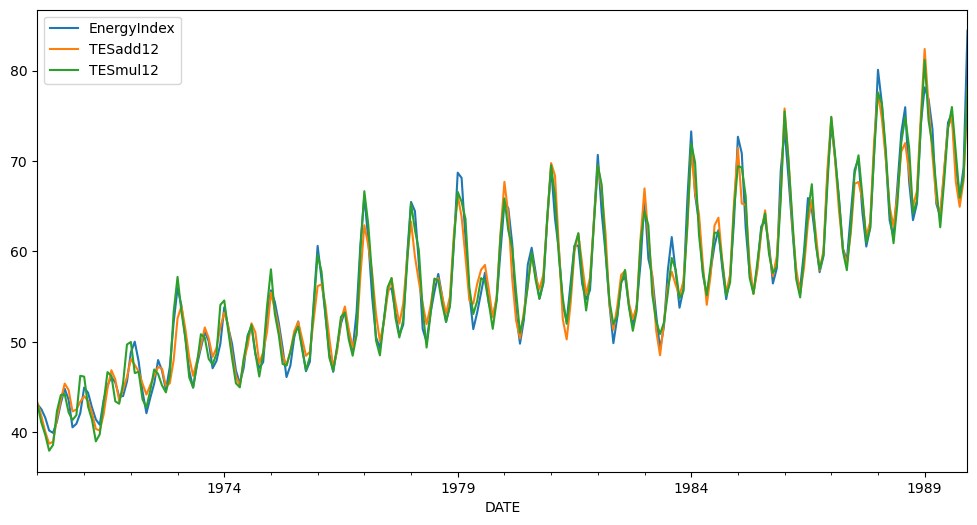

In [32]:
df[['EnergyIndex','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

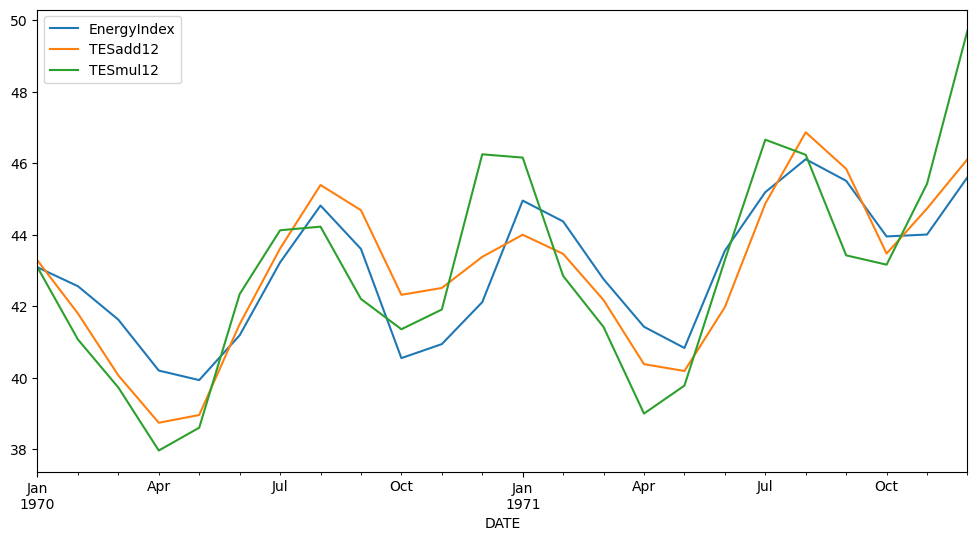

In [36]:
df[['EnergyIndex','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Dapat dilihat bahwa ada seasonal trend dalam data dari seasonal decomposition. Ada juga trend meningkat pada data energy index. Menggunakan 6 month moving average, dapat dilihat smoothing dengan seasonal trend yang masih bisa terlihat. Namun pada 12 month moving average, trend seasonal sudah tidak terlihat. Menggunkan Weighted exponential moving average dan simple exponential smoothing didpatkan hasil yang sama. EWMA dan SES menghasilkan smoothing yang menggambarkan seasonal trend dengan lebih baik dibandingkan 6 month moving average. Menggunakan double exponential smoothing, dapat dilihat bahwa data yang dihasilkan dapat secara sempurna mengikuti alur data asli dengan trend multiplicative ataupun additive. Artinya smoothing ini menghasilkan residue yang paling kecil, namun tidak ada sama sekali efek dari smoothing karena hasil smoothing hampir sama persis dengan data original. Dengan triple exponential smoothing, dapat dilihat bahwa output yang dihasilkan juga mengikuti data original dengan cukup baik, namun masih memiliki residual. Dengan trend additive, hasil smoothing dari triple moving average cendrung memiliki fluktuasi yang sedikit lebih konservatif dibandingkan dengan trend multiplicative. 

Dari semua metode smoothing diatas, exponential weighted moving average memberikan smoothing yang cukup baik dan masih memberikan gambaran mengenai seasonal trend dari data tersebut.

Simple moving average memberikan smoothing paling halus, sedangkan exponential smoothing memberikan hasil yang paling mirip dengan data aslinya.